# Budget Analysis

---

## Environment Setup

In [1]:
# Initial Imports
import os
import plaid
import requests
import datetime
import json
import pandas as pd
from dotenv import load_dotenv

%matplotlib inline

In [2]:
# Helper functions

def pretty_print_response(response):
    """
    This function formats a JSON file to pretty printing it in the screen.
    """
    print(json.dumps(response, indent=4, sort_keys=True))

In [3]:
# Set environment variables from the .env file
load_dotenv()

True

In [4]:
# Extract API keys from environment variables
PLAID_CLIENT_ID = os.getenv("PLAID_CLIENT_ID")
PLAID_SECRET = os.getenv("PLAID_SECRET")
PLAID_PUBLIC_KEY = os.getenv("PLAID_PUBLIC_KEY")


---

## Plaid Access Token

In this section, you will use the `plaid-python` API to generate the correct authentication tokens to access data in the free developer Sandbox. This mimics how you might connect to your own account or a customer account, but due to privacy issues, this homework will only require connecting to and analyzing the fake data from the developer sandbox that Plaid provides. 

Complete the following steps to generate an access token:

1. Create a client to connect to plaid

2. Use the client to generate a public token and request the following items: ['transactions', 'income', 'assets']

3. Exchange the public token for an access token

4. Test the access token by requesting and printing the available test accounts

### 1. Create a client to connect to plaid

In [5]:
# Create the client object
client = plaid.Client(
    client_id=PLAID_CLIENT_ID,
    secret=PLAID_SECRET,
    public_key=PLAID_PUBLIC_KEY,
    environment="sandbox"
)

In [6]:
# Set the institution id
INSTITUTION_ID = "ins_109508"

### 2. Generate a public token

In [7]:
# Create the public token
create_tkn_response = client.Sandbox.public_token.create(
    INSTITUTION_ID,
    ["transactions","income","assets"])
    
# Print the public token
print(create_tkn_response)

{'public_token': 'public-sandbox-0d5e1c57-9fdd-49fa-bc03-500c5b535d4f', 'request_id': 'jp3aj8j5iP6A4GR'}


### 3. Exchange the public token for an access token

In [8]:
# Retrieve the access token
exchange_response = client.Item.public_token.exchange(create_tkn_response["public_token"])
# Print the access token
print(exchange_response)

{'access_token': 'access-sandbox-815998bd-2393-40d9-ab3e-179937f70bc0', 'item_id': 'LmRWj3XE4WiZeMaQz8ekCDv1mD7bPViP13daE', 'request_id': 'fpHdDJyL1Bdw9Is'}


In [9]:
# Store the access token in a Python variable
access_token = exchange_response["access_token"]

### 4. Fetch Accounts

In [10]:
# Retrieve accounts
account_response = client.Accounts.get(access_token)
# Print accounts
print(pretty_print_response(account_response))

{
    "accounts": [
        {
            "account_id": "jGeAZdzQJASd8Drlwz84UBd9RxgRX3f1qZjEB",
            "balances": {
                "available": 100,
                "current": 110,
                "iso_currency_code": "USD",
                "limit": null,
                "unofficial_currency_code": null
            },
            "mask": "0000",
            "name": "Plaid Checking",
            "official_name": "Plaid Gold Standard 0% Interest Checking",
            "subtype": "checking",
            "type": "depository"
        },
        {
            "account_id": "74JBQjkzaBT5w7zjDMwkfoVWKPbKNvigLMaZK",
            "balances": {
                "available": 200,
                "current": 210,
                "iso_currency_code": "USD",
                "limit": null,
                "unofficial_currency_code": null
            },
            "mask": "1111",
            "name": "Plaid Saving",
            "official_name": "Plaid Silver Standard 0.1% Interest Saving",
       

---

# Account Transactions with Plaid

In this section, you will use the Plaid Python SDK to connect to the Developer Sandbox account and grab a list of transactions. You will need to complete the following steps:


1. Use the access token to fetch the transactions for the last 90 days

2. Print the categories for each transaction type

3. Create a new DataFrame using the following fields from the JSON transaction data: `date, name, amount, category`. (For categories with more than one label, just use the first category label in the list)

4. Convert the data types to the appropriate types (i.e. datetimeindex for the date and float for the amount)

### 1. Fetch the Transactions for the last 90 days

In [11]:
# Set the start and end date 90 days from today
start_date = "{:%Y-%m-%d}".format(datetime.datetime.now() +
                                 datetime.timedelta(-90))
end_date = "{:%Y-%m-%d}".format(datetime.datetime.now())

# Retrieve the transactions for the last 90 days
transaction_response = client.Transactions.get(access_token, start_date, end_date)
# Print the transactions
print(pretty_print_response(transaction_response))


{
    "accounts": [
        {
            "account_id": "jGeAZdzQJASd8Drlwz84UBd9RxgRX3f1qZjEB",
            "balances": {
                "available": 100,
                "current": 110,
                "iso_currency_code": "USD",
                "limit": null,
                "unofficial_currency_code": null
            },
            "mask": "0000",
            "name": "Plaid Checking",
            "official_name": "Plaid Gold Standard 0% Interest Checking",
            "subtype": "checking",
            "type": "depository"
        },
        {
            "account_id": "74JBQjkzaBT5w7zjDMwkfoVWKPbKNvigLMaZK",
            "balances": {
                "available": 200,
                "current": 210,
                "iso_currency_code": "USD",
                "limit": null,
                "unofficial_currency_code": null
            },
            "mask": "1111",
            "name": "Plaid Saving",
            "official_name": "Plaid Silver Standard 0.1% Interest Saving",
       

### 2. Print the categories for each transaction

In [12]:
# Create a for-loop to print the categories for each transaction

for transactions in transaction_response["transactions"]:
    for key, value in transactions.items():
        if key == "category":
            print(value)

    


['Food and Drink', 'Restaurants', 'Fast Food']
['Food and Drink', 'Restaurants', 'Coffee Shop']
['Food and Drink', 'Restaurants']
['Transfer', 'Credit']
['Travel', 'Airlines and Aviation Services']
['Travel', 'Taxi']
['Food and Drink', 'Restaurants']
['Payment']
['Food and Drink', 'Restaurants', 'Fast Food']
['Shops', 'Sporting Goods']
['Payment', 'Credit Card']
['Travel', 'Taxi']
['Transfer', 'Debit']
['Transfer', 'Deposit']
['Recreation', 'Gyms and Fitness Centers']
['Travel', 'Airlines and Aviation Services']
['Food and Drink', 'Restaurants', 'Fast Food']
['Food and Drink', 'Restaurants', 'Coffee Shop']
['Food and Drink', 'Restaurants']
['Transfer', 'Credit']
['Travel', 'Airlines and Aviation Services']
['Travel', 'Taxi']
['Food and Drink', 'Restaurants']
['Payment']
['Food and Drink', 'Restaurants', 'Fast Food']
['Shops', 'Sporting Goods']
['Payment', 'Credit Card']
['Travel', 'Taxi']
['Transfer', 'Debit']
['Transfer', 'Deposit']
['Recreation', 'Gyms and Fitness Centers']
['Travel'

### 3. Create a new DataFrame using the following fields from the JSON transaction data: `date`, `name`, `amount`, `category`. 

(For categories with more than one label, just use the first category label in the list)

In [13]:
# Define an empty DataFrame and set the columns as date, name, amount, and category
columns = ['date','name','amount','category']
transactions_df = pd.DataFrame(data = transaction_response["transactions"],columns=columns)

transactions_df[["category_1", "category_2", "category_3"]] = transactions_df.category.apply(
    lambda x: pd.Series(str(x).split(",")))

transactions_df = transactions_df.drop(columns=["category", "category_2", "category_3"])

transactions_df["category_1"] = transactions_df["category_1"].str.replace(r'[', "")
transactions_df["category_1"] = transactions_df["category_1"].str.replace(r']', "")

# Retrieve all the transactions
# Display sample data from the DataFrame    
transactions_df

,date,name,amount,category_1
0,2020-07-11,McDonald's,12.00,'Food and Drink'
1,2020-07-11,Starbucks,4.33,'Food and Drink'
2,2020-07-10,SparkFun,89.40,'Food and Drink'
3,2020-07-09,INTRST PYMNT,-4.22,'Transfer'
4,2020-06-29,United Airlines,500.00,'Travel'
5,2020-06-27,Uber 072515 SF**POOL**,6.33,'Travel'
6,2020-06-24,Tectra Inc,500.00,'Food and Drink'
7,2020-06-23,AUTOMATIC PAYMENT - THANK,2078.50,'Payment'
8,2020-06-23,KFC,500.00,'Food and Drink'
9,2020-06-23,Madison Bicycle Shop,500.00,'Shops'


### 4. Convert the data types to the appropriate types 

(i.e. datetimeindex for the date and float for the amount)

In [14]:
# Display data types
transactions_df.dtypes

date           object
name           object
amount        float64
category_1     object
dtype: object

In [15]:
# Make any required data type transformation
transactions_df["date"] = pd.to_datetime(transactions_df["date"])
transactions_df.dtypes

date          datetime64[ns]
name                  object
amount               float64
category_1            object
dtype: object

In [16]:
# Set the date column as index
transactions_df.set_index("date", inplace=True)
# Display sample data
transactions_df

,name,amount,category_1
date,,,
2020-07-11,McDonald's,12.00,'Food and Drink'
2020-07-11,Starbucks,4.33,'Food and Drink'
2020-07-10,SparkFun,89.40,'Food and Drink'
2020-07-09,INTRST PYMNT,-4.22,'Transfer'
2020-06-29,United Airlines,500.00,'Travel'
2020-06-27,Uber 072515 SF**POOL**,6.33,'Travel'
2020-06-24,Tectra Inc,500.00,'Food and Drink'
2020-06-23,AUTOMATIC PAYMENT - THANK,2078.50,'Payment'
2020-06-23,KFC,500.00,'Food and Drink'


---

# Income Analysis with Plaid

In this section, you will use the Plaid Sandbox to complete the following:

1. Determine the previous year's gross income and print the results

2. Determine the current monthly income and print the results

3. Determine the projected yearly income and print the results

In [17]:
# Fetch de income data
start_date = "{:%Y-%m-%d}".format(datetime.datetime.now() +
                                 datetime.timedelta(-365))
end_date = "{:%Y-%m-%d}".format(datetime.datetime.now())

# Retrieve the transactions for the last 90 days
income_response = client.Income.get((access_token))
# Print the income data
print(pretty_print_response(income_response))

{
    "income": {
        "income_streams": [
            {
                "confidence": 0.99,
                "days": 690,
                "monthly_income": 500,
                "name": "UNITED AIRLINES"
            }
        ],
        "last_year_income": 6000,
        "last_year_income_before_tax": 7285,
        "max_number_of_overlapping_income_streams": 1,
        "number_of_income_streams": 1,
        "projected_yearly_income": 6085,
        "projected_yearly_income_before_tax": 7389
    },
    "request_id": "0jo9INZWBclBBtx"
}
None


In [18]:
# Determine the previous year's gross income and print the results
previous_year_gross_income = income_response["income"]["last_year_income_before_tax"]
print(f"The previous year's gross income was: {previous_year_gross_income}")

The previous year's gross income was: 7285


In [19]:
# Determine the current monthly income and print the results
current_monthly_income = income_response["income"]["income_streams"][0]["monthly_income"]
print(f"The monthly income in the current year is: {current_monthly_income}")

The monthly income in the current year is: 500


In [20]:
# Determine the projected yearly income and print the results
projected_yearly_income = income_response["income"]["projected_yearly_income"]
print(f"The projected yearly income is: {projected_yearly_income}")

The projected yearly income is: 6085


---

# Budget Analysis
In this section, you will use the transactions DataFrame to analyze the customer's budget

1. Calculate the total spending per category and print the results (Hint: groupby or count transactions per category)

2. Generate a bar chart with the number of transactions for each category

3. Calulate the expenses per month

4. Plot the total expenses per month

### Calculate the expenses per category

In [21]:
# Compute the total expenses per category
transactions_sliced = transactions_df[["category_1", "amount"]]
transactions_grouped = transactions_sliced.groupby(["category_1"]).sum().reset_index()
# Display the expenses per catefory
transactions_grouped

,category_1,amount
0,'Food and Drink',3333.52
1,'Payment',6310.50
2,'Recreation',235.50
3,'Shops',1500.00
4,'Transfer',20537.34
5,'Travel',35.19


In [28]:
import matplotlib.pyplot as plt

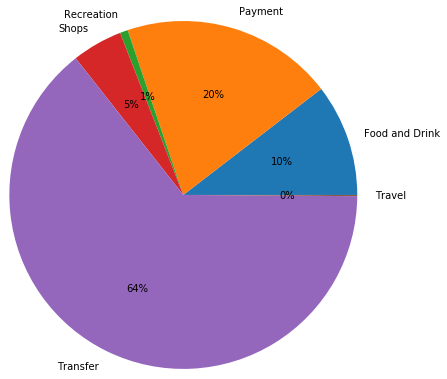

In [108]:
# Create a spending categories pie chart.
labels = ["Food and Drink", "Payment", "Recreation", "Shops", "Transfer", "Travel"]
plt.pie(transactions_grouped["amount"], autopct='%1.0f%%',radius=2, labels=labels, explode=None)
plt.savefig('Expense_Breakdown.png', bbox_inches="tight")

### Calculate the expenses per month

In [107]:
# Create a DataFrame with the total expenses
transactions_grouped_date = transactions_df[["amount"]].groupby([transactions_df.index.month]).sum().reset_index()
# Display sample data
transactions_grouped_date

,date,amount
0,4,10560.06
1,5,10645.24
2,6,10645.24
3,7,101.51


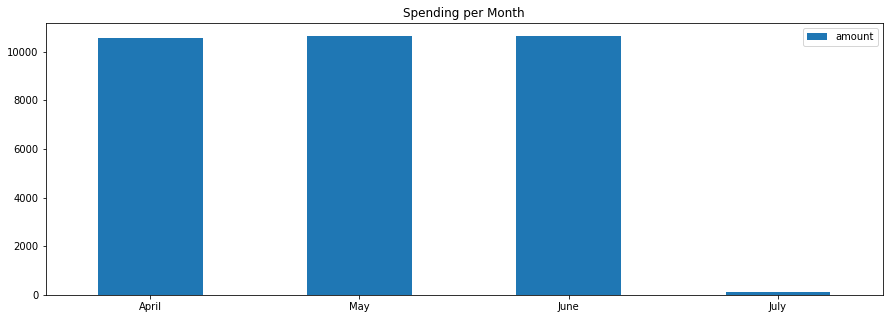

In [106]:
# Create a spending per month bar chart
xaxis_labels = ["April", "May", "June", "July"]
ax = transactions_grouped_date.plot(kind="bar", y="amount", figsize=(15,5), title= "Spending per Month")
ax.set_xticklabels(xaxis_labels, rotation="horizontal")
plt.savefig('Spending_per_month.png', bbox_inches="tight")